## PCA and Clustering 

Delta Airlines' website have data on all of their aircraft in a certain site section.
In this homework, we will investigate the different aircraft in Delta’s fleet. Which planes are similar? Which are dissimilar?

In [1]:
# Make sure you are running on Colab
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
#     !pip install yellowbrick
#     !pip install gower
#     !pip install scikit-learn-extra
#     !pip install kmodes

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import plotly.express as px
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

In [3]:
# We begin by loading inspecting the data
delta_data = pd.read_csv('delta.csv', index_col=0).reset_index()

In [4]:
delta_data.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


### Check correlation with visualization
 Visualize pairwise correlation using scatterplot for columns ``'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)'`` (i.e., columns 16-23 in ``delta_data``)

<Figure size 1080x1080 with 0 Axes>

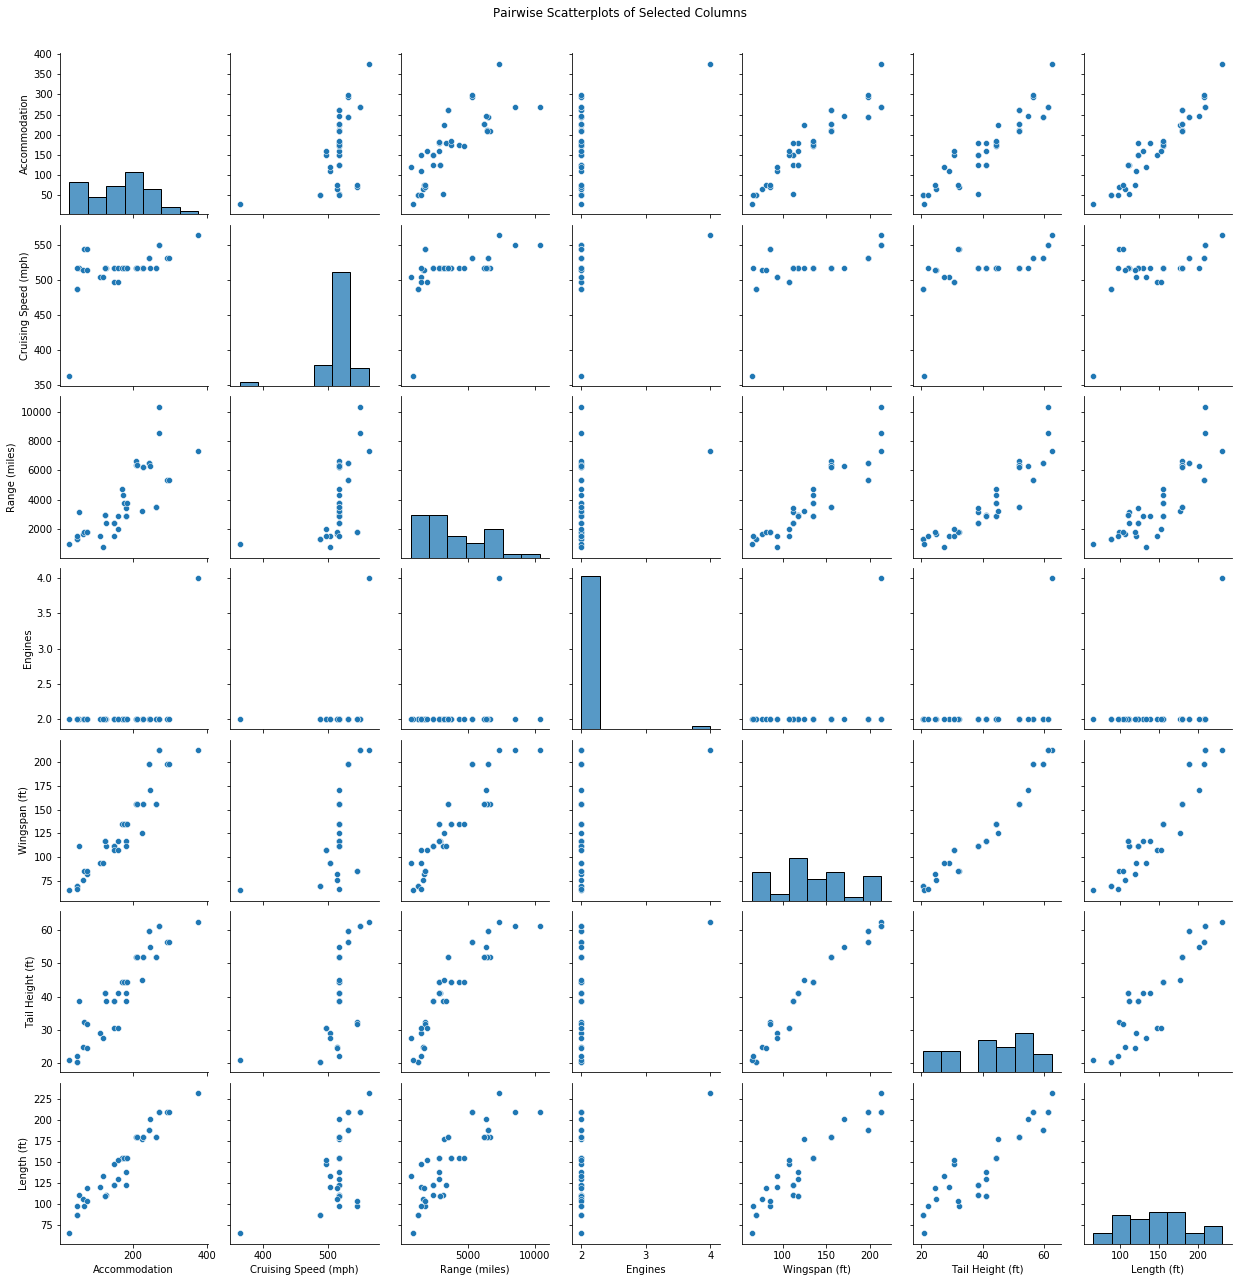

In [5]:
columns_to_plot = ['Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 
                   'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']
filtered_data = delta_data[columns_to_plot]

# Visualize the pairwise correlations using scatterplots
plt.figure(figsize=(15, 15))
sns.pairplot(filtered_data)
plt.suptitle('Pairwise Scatterplots of Selected Columns', y=1.02)
plt.show()

### Prepare X
 Identify all binary columns (i.e., a binary column is the column that only contains ``0`` and ``1`` as values)

 Generate a dataframe ``X`` removing these binary columns and column ``Aircraft`` (since this is the ``y``)

In [6]:

binary_columns = delta_data.columns[delta_data.apply(lambda x: x.nunique() == 2 and 
                                                     set(x.unique()) == {0, 1})]

binary_columns.tolist()


['Wifi',
 'Video',
 'Power',
 'Satellite',
 'Flat-bed',
 'Sleeper',
 'Club',
 'First Class',
 'Business',
 'Eco Comfort',
 'Economy']

In [7]:

X = delta_data.drop(columns=binary_columns.tolist() + ['Aircraft'])

X.head()


,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Seat Width (Economy),Seat Pitch (Economy),Seats (Economy),Accommodation,Cruising Speed (mph),Range (miles),Engines,Wingspan (ft),Tail Height (ft),Length (ft)
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,30.5,96,126,517,2399,2,111.83,38.583,111.00
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,0.0,0.0,0,54,517,3119,2,111.83,38.583,111.00
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,17.2,31.5,120,150,517,2420,2,111.83,38.583,123.25
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,18.0,30.5,181,243,531,6536,2,197.83,59.830,188.67


### Exercise 3: PCA
__(1 point)__ Standardize X

__(1 point)__ conduct PCA 

__(1 point)__ calculate the amount of varialce each principal component explain, as well as the cumulative sum

__(1 point)__ visualize the cumulative sum of explained variance and set the xticks as the number of components


In [8]:
# standardize X 
delta_normalized = StandardScaler().fit_transform(X)

In [9]:
#conduct PCA 
pca = PCA().fit(delta_normalized)


pca.explained_variance_ratio_


array([4.63148487e-01, 2.51071052e-01, 1.61265689e-01, 4.68733864e-02,
       3.60892657e-02, 1.84418981e-02, 9.47340752e-03, 4.34022199e-03,
       3.28954319e-03, 1.43450053e-03, 1.20846026e-03, 9.51526552e-04,
       7.88782498e-04, 6.43276642e-04, 3.88597783e-04, 2.71942151e-04,
       1.68280380e-04, 1.11848384e-04, 2.93264482e-05, 1.05081889e-05,
       1.02677725e-33, 3.26663324e-34])

In [10]:


exp_var = pca.explained_variance_ratio_ 
# cumulative sum of variance explained
exp_var_cumsum = np.cumsum(exp_var)

exp_var_cumsum

array([0.46314849, 0.71421954, 0.87548523, 0.92235861, 0.95844788,
       0.97688978, 0.98636318, 0.99070341, 0.99399295, 0.99542745,
       0.99663591, 0.99758744, 0.99837622, 0.9990195 , 0.99940809,
       0.99968004, 0.99984832, 0.99996017, 0.99998949, 1.        ,
       1.        , 1.        ])

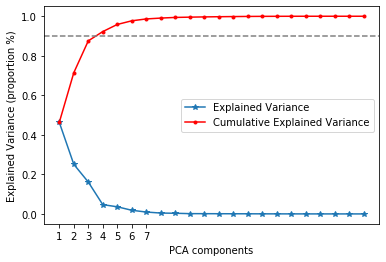

In [11]:

plt.plot(range(1, len(exp_var)+1),
        exp_var,'*-',label='Explained Variance')

plt.plot(range(1, len(exp_var)+1),
        exp_var_cumsum,'r.-',label='Cumulative Explained Variance')



plt.legend()
ax = plt.gca()
ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xlabel('PCA components')
ax.set_ylabel('Explained Variance (proportion %)')

# which shows that the first 4 PCs accounts for more than 90% of the variance of the data.
plt.axhline(0.9,linestyle='--',color='grey')




### Clustering

So, now that we’ve simplified the complex data set into a lower dimensional space we can visualize and
work with, we will use clustering to find patterns in the data, in our case, the aircraft which are most
similar? 

Pick the number of components which explain 90% (or a little greater) of the variation and represent the transformed data (projected onto the selected principal components) as ``components``

Using ``components`` as the input, run k-means for k from ``2`` to ``15`` (with ``random_state=1``), and visualize SSE by elbow curve.

Select the best k using elbow curve and run clustering with the selected k to get the cluster assignment

Visualize the cluster membership by scatter plots (for each pair of principle components as ``x`` and ``y`` axes)



**As we can see from Cummulative Explained variance we should choose the PCA = 4 which capture more than 90% of variance of dataset**

In [12]:
pca_selected = PCA(n_components=4)
X_transformed_selected = pca_selected.fit_transform(delta_normalized)

X_transformed_selected

array([[-1.84652372, -1.0591082 , -0.6953523 , -0.19866676],
       [-6.33909895, 13.98526597, -3.51576711, -0.18923733],
       [-1.53491578, -1.16025785, -0.79541609, -0.03216956],
       [-1.53491578, -1.16025785, -0.79541609, -0.03216956],
       [ 3.9562209 ,  0.86360087,  0.66580318, -0.58779515],
       [ 4.12842125,  1.01168695,  0.75569671, -0.72390997],
       [ 4.50224495,  0.88432123,  0.5334209 , -0.29482082],
       [ 4.37400273,  0.7336244 ,  0.43212088, -0.1720595 ],
       [-2.42900012, -1.35151439, -0.2842276 , -0.25787143],
       [-1.71205095, -1.01483685, -0.75726596, -0.23726418],
       [-1.61314883, -1.06648842, -0.986415  , -0.07526201],
       [-1.36046704, -1.06649016, -1.13031618,  0.03407051],
       [-1.12092887, -1.09770082, -1.39483853,  0.1677043 ],
       [ 7.10542267,  1.53910203, -0.35287353,  5.73962853],
       [-0.80032069, -1.04589103, -1.71971768,  0.1121078 ],
       [ 1.60633402,  0.57664449,  1.40250477, -0.78473106],
       [-0.87462651, -1.

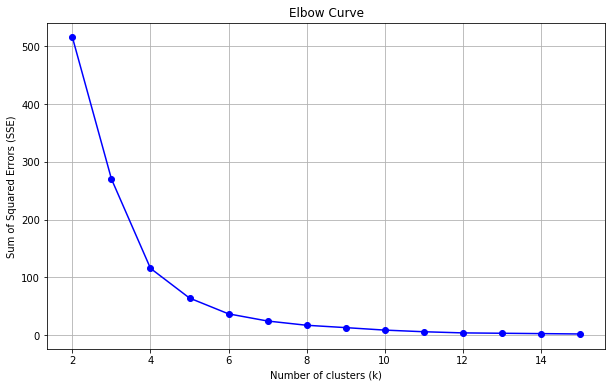

In [13]:
from sklearn.cluster import KMeans

# List to store the SSE for each value of k
sse = []

# Range of k values
k_range = range(2, 16)

# Run k-means for each value of k and compute SSE
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_transformed_selected)
    sse.append(kmeans.inertia_)

# Visualize SSE by plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [17]:
sse_diff = [sse[i] - sse[i+1] for i in range(len(sse)-1)]
best_k = 4

# Run k-means clustering with the selected k
kmeans_best = KMeans(n_clusters=best_k, random_state=1)
cluster_assignment = kmeans_best.fit_predict(X_transformed_selected)

cluster_assignment

array([1, 3, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1],
      dtype=int32)

Based on the elbow curve, the best value for k is determined to be 2

Using k = 2, we can run the k-means clustering, and the resulting cluster assignments for each data point are displayed above.

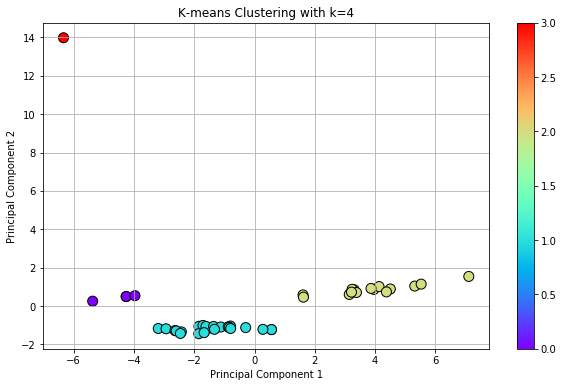

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed_selected[:, 0], X_transformed_selected[:, 1], c=cluster_assignment, cmap='rainbow', edgecolor='k', s=100)
plt.colorbar()
plt.title(f'K-means Clustering with k={best_k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


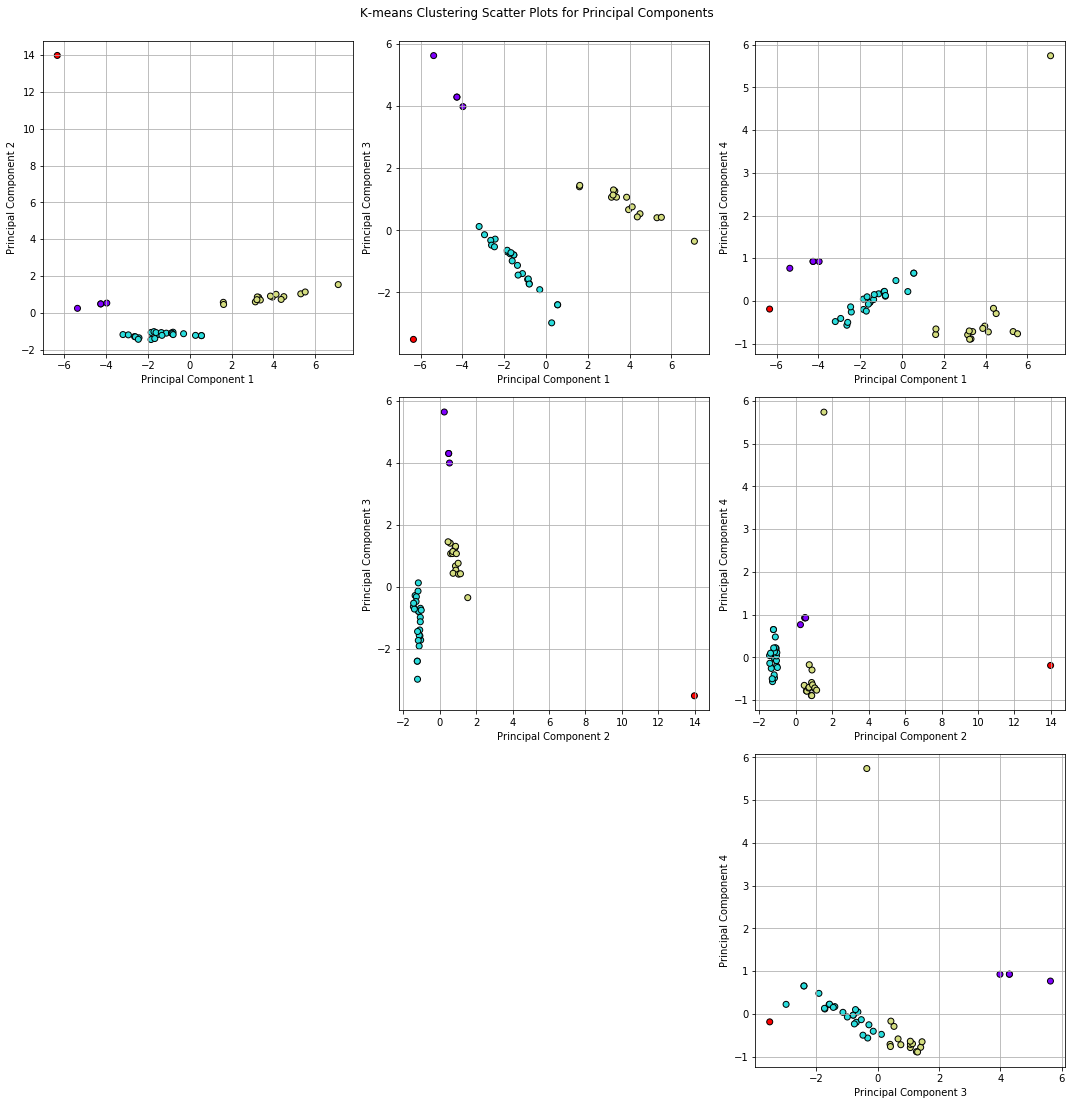

In [19]:
fig, axs = plt.subplots(4-1, 4-1, figsize=(15, 15))
fig.suptitle('K-means Clustering Scatter Plots for Principal Components', y=1.02)

for i in range(4-1):
    for j in range(i+1, 4):
        axs[i, j-1].scatter(X_transformed_selected[:, i], X_transformed_selected[:, j], c=cluster_assignment, cmap='rainbow', edgecolor='k')
        axs[i, j-1].set_xlabel(f'Principal Component {i+1}')
        axs[i, j-1].set_ylabel(f'Principal Component {j+1}')
        axs[i, j-1].grid(True)


for i in range(4-1):
    for j in range(i):
        fig.delaxes(axs[i][j])

plt.tight_layout()
plt.show()